# 图
## 图的基础概念
## 图的基础操作 

### 基于邻接矩阵的实现

给定一个顶点数量为$n$的无向图，各种操作的实现方式如图所示：
* 初始化邻接矩阵
* 添加边
* 添加顶点
* 删除边
* 删除顶点
  

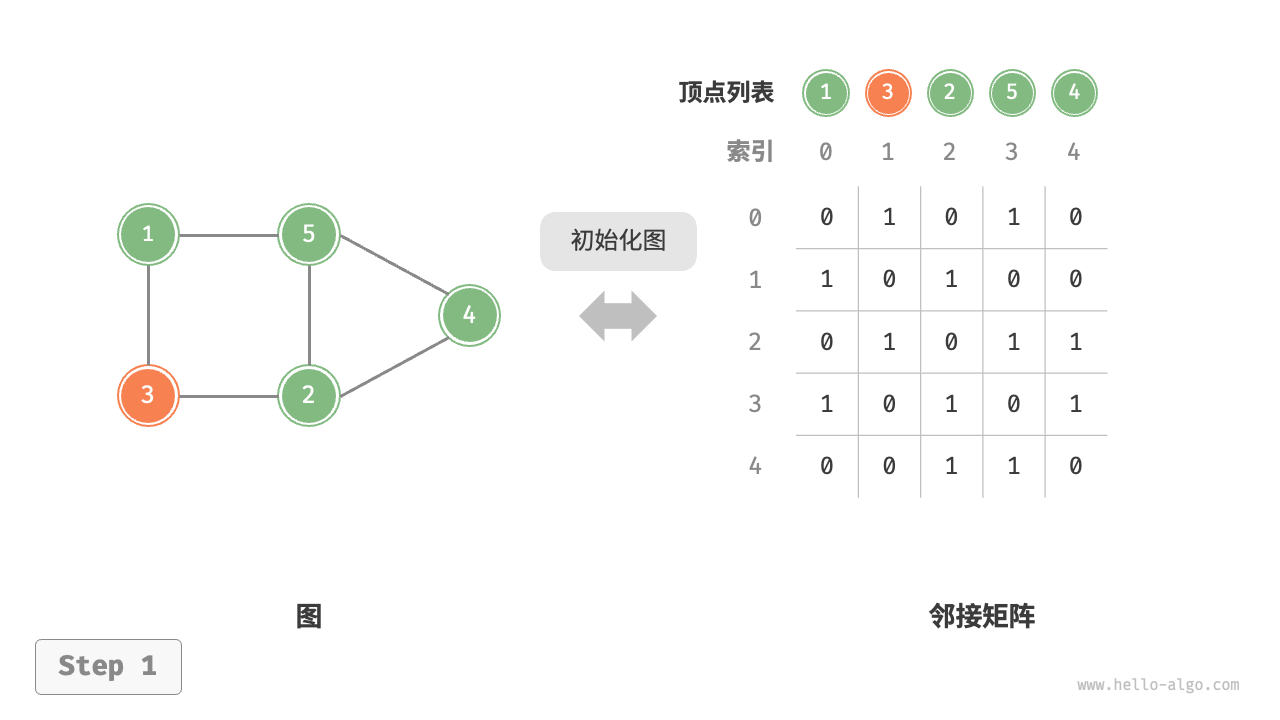

In [2]:
class GraphAdjMat:
    """基于邻接矩阵实现的无向图类"""

    def __init__(self, vertices: list[int], edges: list[list[int]]):
        """构造方法"""
        self.vertices: list[int] = []
        self.adj_mat: list[list[int]] = []
        # 添加顶点
        for val in vertices:
            self.add_vertex(val)
        # 添加边
        for e in edges:
            self.add_edge(e[0], e[1])

    def size(self) -> int:
        """获取顶点数量"""
        return len(self.vertices)

    def add_vertex(self, val: int):
        """添加顶点"""
        n = self.size()
        # 向顶点列表中添加新顶点的值
        self.vertices.append(val)
        # 在邻接矩阵中添加一行
        new_row = [0] * n
        self.adj_mat.append(new_row)
        # 在邻接矩阵中添加一列
        for row in self.adj_mat:
            row.append(0)

    def remove_vertex(self, index: int):
        """删除顶点"""
        if index >= self.size():
            raise IndexError()
        # 在顶点列表中移除索引 index 的顶点
        self.vertices.pop(index)
        # 在邻接矩阵中删除索引 index 的行
        self.adj_mat.pop(index)
        # 在邻接矩阵中删除索引 index 的列
        for row in self.adj_mat:
            row.pop(index)

    def add_edge(self, i: int, j: int):
        """添加边"""
        # 索引越界与相等处理
        if i < 0 or j < 0 or i >= self.size() or j >= self.size() or i == j:
            raise IndexError()
        self.adj_mat[i][j] = 1
        self.adj_mat[j][i] = 1

    def remove_edge(self, i: int, j: int):
        """删除边"""
        # 索引越界与相等处理
        if i < 0 or j < 0 or i >= self.size() or j >= self.size() or i == j:
            raise IndexError()
        self.adj_mat[i][j] = 0
        self.adj_mat[j][i] = 0


"""Driver Code"""
if __name__ == "__main__":
    # 初始化无向图
    vertices = [1, 3, 2, 5, 4]
    edges = [[0, 1], [0, 3], [1, 2], [2, 3], [2, 4], [3, 4]]
    graph = GraphAdjMat(vertices, edges)

    # 添加边
    # 顶点 1, 2 的索引分别为 0, 2
    graph.add_edge(0, 2)

    # 删除边
    # 顶点 1, 3 的索引分别为 0, 1
    graph.remove_edge(0, 1)

    # 添加顶点
    graph.add_vertex(6)

    # 删除顶点
    # 顶点 3 的索引为 1
    graph.remove_vertex(1)

## 图的遍历

相比于树的一对一的关系，图具有更高的自由度，可以自由表示多对多的关系。
* 广度优先遍历 (BFS)
* 深度优先遍历 (DFS)


In [ ]:
from collections import deque

class Vertex:
    """顶点类"""
    def __init__(self, val: int):
        self.val = val

def vals_to_vets(vals: list[int]) -> list["Vertex"]:
    """输入值列表 vals ，返回顶点列表 vets"""
    return [Vertex(val) for val in vals]

class GraphAdjList:
    """基于邻接表实现的无向图类"""

    def __init__(self, edges: list[list[Vertex]]):
        """构造方法"""
        self.adj_list = dict[Vertex, list[Vertex]]()
        for edge in edges:
            self.add_vertex(edge[0])
            self.add_vertex(edge[1])
            self.add_edge(edge[0], edge[1])

    def add_edge(self, vet1: Vertex, vet2: Vertex):
        """添加边"""
        if vet1 not in self.adj_list or vet2 not in self.adj_list or vet1 == vet2:
            raise ValueError()
        self.adj_list[vet1].append(vet2)
        self.adj_list[vet2].append(vet1)

    def add_vertex(self, vet: Vertex):
        """添加顶点"""
        if vet in self.adj_list:
            return
        self.adj_list[vet] = []

def graph_bfs(graph: GraphAdjList, start_vet: Vertex) -> list[Vertex]:
    """## 广度优先遍历

    ### Args:
        - `graph (GraphAdjMat)`: _description_
        - `start_vet (_type_)`: _description_
    """
    #使用邻接表表示图，以便获取指定顶点的所有相邻的节点
    #顶点遍历序列
    res = []
    visited = set[Vertex](([start_vet]))
    # 队列实现BFS
    que = deque[Vertex()]([start_vet])
    while len(que) > 0 :
        vet = que.popleft() # 队首顶点出队
        res.append(vet) #记录首个定点
        # 遍历该顶点的所有顶点
        for adj_vet in graph.adj_list[vet]:
            if adj_vet in visited:
                continue
            que.append(adj_vet)
            visited.add(adj_vet)
    return res

In [1]:
from collections import deque

class Vertex:
    """顶点类"""
    def __init__(self, val: int):
        self.val = val

def vals_to_vets(vals: list[int]) -> list["Vertex"]:
    """输入值列表 vals ，返回顶点列表 vets"""
    return [Vertex(val) for val in vals]

class GraphAdjList:
    """基于邻接表实现的无向图类"""

    def __init__(self, edges: list[list[Vertex]]):
        """构造方法"""
        self.adj_list = dict[Vertex, list[Vertex]]()
        for edge in edges:
            self.add_vertex(edge[0])
            self.add_vertex(edge[1])
            self.add_edge(edge[0], edge[1])

    def add_edge(self, vet1: Vertex, vet2: Vertex):
        """添加边"""
        if vet1 not in self.adj_list or vet2 not in self.adj_list or vet1 == vet2:
            raise ValueError()
        self.adj_list[vet1].append(vet2)
        self.adj_list[vet2].append(vet1)

    def add_vertex(self, vet: Vertex):
        """添加顶点"""
        if vet in self.adj_list:
            return
        self.adj_list[vet] = []


def graph_bfs(graph: GraphAdjList, start_vet: Vertex) -> list[Vertex]:
    """广度优先遍历"""
    # 顶点遍历序列
    res = []
    # 哈希表，用于记录已被访问过的顶点
    visited = set[Vertex]([start_vet])
    # 队列用于实现 BFS
    que = deque[Vertex]([start_vet])
    # 以顶点 vet 为起点，循环直至访问完所有顶点
    while len(que) > 0:
        vet = que.popleft()  # 队首顶点出队
        res.append(vet)  # 记录访问顶点
        # 遍历该顶点的所有邻接顶点
        for adj_vet in graph.adj_list[vet]:
            if adj_vet in visited:
                continue  # 跳过已被访问的顶点
            que.append(adj_vet)  # 只入队未访问的顶点
            visited.add(adj_vet)  # 标记该顶点已被访问
    # 返回顶点遍历序列
    return res

"""Driver Code"""
if __name__ == "__main__":
    # 初始化无向图
    v = vals_to_vets([0, 1, 2, 3, 4])
    edges = [
        [v[0], v[1]],
        [v[0], v[3]],
        [v[1], v[2]],
        [v[1], v[4]],
        [v[3], v[4]],
    ]
    graph = GraphAdjList(edges)
    del edges

    # 广度优先遍历
    res = graph_bfs(graph, v[0])

### DFS (深度优先遍历)


In [2]:
def dfs(graph: GraphAdjList, visited: set[Vertex], res: list[Vertex], vet: Vertex):
    """深度优先遍历辅助函数"""
    res.append(vet)  # 记录访问顶点
    visited.add(vet)  # 标记该顶点已被访问
    # 遍历该顶点的所有邻接顶点
    for adjVet in graph.adj_list[vet]:
        if adjVet in visited:
            continue  # 跳过已被访问的顶点
        # 递归访问邻接顶点
        dfs(graph, visited, res, adjVet)

def graph_dfs(graph: GraphAdjList, start_vet: Vertex) -> list[Vertex]:
    """深度优先遍历"""
    # 使用邻接表来表示图，以便获取指定顶点的所有邻接顶点
    # 顶点遍历序列
    res = []
    # 哈希集合，用于记录已被访问过的顶点
    visited = set[Vertex]()
    dfs(graph, visited, res, start_vet)
    return res